# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [ ]:
# Load the corpus
with open('business_26.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

# A small sample of the corpus
file[0][:3000]

'Business fears over sluggish EU economy\n'

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [ ]:
# Your code here to process the data
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['business', 'fears', 'over', 'sluggish', 'eu', 'economy', 'as', 'european', 'leaders', 'gather']
There are 399 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [ ]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('Business fears over sluggish EU econoomy', vocab)

['econoomy']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [ ]:
# Delete letter
def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="cans", verbose=True)

input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [ ]:
# Switch letter
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="Teh", verbose=True)

Input word = Teh 
split_l = [('', 'Teh'), ('T', 'eh'), ('Te', 'h')] 
switch_l = ['eTh', 'The']


In [ ]:
# Replace letter
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='the', verbose=True)

Input word = the 
split_l = [('', 'the'), ('t', 'he'), ('th', 'e')] 
replace_l = ['ahe', 'bhe', 'che', 'dhe', 'ehe', 'fhe', 'ghe', 'hhe', 'ihe', 'jhe', 'khe', 'lhe', 'mhe', 'nhe', 'ohe', 'phe', 'qhe', 'rhe', 'she', 'tae', 'tbe', 'tce', 'tde', 'tee', 'tfe', 'tge', 'tha', 'thb', 'thc', 'thd', 'thf', 'thg', 'thh', 'thi', 'thj', 'thk', 'thl', 'thm', 'thn', 'tho', 'thp', 'thq', 'thr', 'ths', 'tht', 'thu', 'thv', 'thw', 'thx', 'thy', 'thz', 'tie', 'tje', 'tke', 'tle', 'tme', 'tne', 'toe', 'tpe', 'tqe', 'tre', 'tse', 'tte', 'tue', 'tve', 'twe', 'txe', 'tye', 'tze', 'uhe', 'vhe', 'whe', 'xhe', 'yhe', 'zhe']


In [ ]:
# Insert letter
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('the', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word the 
split_l = [('', 'the'), ('t', 'he'), ('th', 'e'), ('the', '')] 
insert_l = ['athe', 'bthe', 'cthe', 'dthe', 'ethe', 'fthe', 'gthe', 'hthe', 'ithe', 'jthe', 'kthe', 'lthe', 'mthe', 'nthe', 'othe', 'pthe', 'qthe', 'rthe', 'sthe', 'tthe', 'uthe', 'vthe', 'wthe', 'xthe', 'ythe', 'zthe', 'tahe', 'tbhe', 'tche', 'tdhe', 'tehe', 'tfhe', 'tghe', 'thhe', 'tihe', 'tjhe', 'tkhe', 'tlhe', 'tmhe', 'tnhe', 'tohe', 'tphe', 'tqhe', 'trhe', 'tshe', 'tthe', 'tuhe', 'tvhe', 'twhe', 'txhe', 'tyhe', 'tzhe', 'thae', 'thbe', 'thce', 'thde', 'thee', 'thfe', 'thge', 'thhe', 'thie', 'thje', 'thke', 'thle', 'thme', 'thne', 'thoe', 'thpe', 'thqe', 'thre', 'thse', 'thte', 'thue', 'thve', 'thwe', 'thxe', 'thye', 'thze', 'thea', 'theb', 'thec', 'thed', 'thee', 'thef', 'theg', 'theh', 'thei', 'thej', 'thek', 'thel', 'them', 'then', 'theo', 'thep', 'theq', 'ther', 'thes', 'thet', 'theu', 'thev', 'thew', 'thex', 'they', 'thez']
Number of strings output by insert_letter('at') is 104


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [ ]:
# Edit one letter
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set


In [ ]:
tmp_word = "the"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : the 
edit_one_l 
['ahe', 'athe', 'bhe', 'bthe', 'che', 'cthe', 'dhe', 'dthe', 'ehe', 'ethe', 'fhe', 'fthe', 'ghe', 'gthe', 'he', 'hhe', 'hte', 'hthe', 'ihe', 'ithe', 'jhe', 'jthe', 'khe', 'kthe', 'lhe', 'lthe', 'mhe', 'mthe', 'nhe', 'nthe', 'ohe', 'othe', 'phe', 'pthe', 'qhe', 'qthe', 'rhe', 'rthe', 'she', 'sthe', 'tae', 'tahe', 'tbe', 'tbhe', 'tce', 'tche', 'tde', 'tdhe', 'te', 'tee', 'teh', 'tehe', 'tfe', 'tfhe', 'tge', 'tghe', 'th', 'tha', 'thae', 'thb', 'thbe', 'thc', 'thce', 'thd', 'thde', 'thea', 'theb', 'thec', 'thed', 'thee', 'thef', 'theg', 'theh', 'thei', 'thej', 'thek', 'thel', 'them', 'then', 'theo', 'thep', 'theq', 'ther', 'thes', 'thet', 'theu', 'thev', 'thew', 'thex', 'they', 'thez', 'thf', 'thfe', 'thg', 'thge', 'thh', 'thhe', 'thi', 'thie', 'thj', 'thje', 'thk', 'thke', 'thl', 'thle', 'thm', 'thme', 'thn', 'thne', 'tho', 'thoe', 'thp', 'thpe', 'thq', 'thqe', 'thr', 'thre', 'ths', 'thse', 'tht', 'thte', 'thu', 'thue', 'thv', 'thve', 'thw', 'thwe', 'thx', 't

In [ ]:
# Edit two letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [ ]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [ ]:
def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 399 key values pairs
The count for the word 'thee' is 0


In [ ]:
def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('you') is {probs['you']:.4f}")

Length of probs is 399
P('you') is 0.0012


In [ ]:
def g_p(w_c_d):
  probs = {}
  t = sum(w_c_d.values())
  for word in w_c_d.keys():
    probs[word] = w_c_d[word] / t
  return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('business') is {probs['business']:.4f}")

Length of probs is 399
P('business') is 0.0061


<Axes: xlabel='word'>

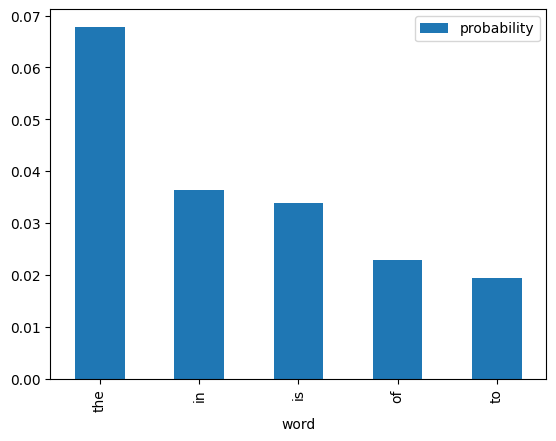

In [ ]:
# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')

### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [ ]:
# Your code here to replace misspells
def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('annd', vocab, probs, 100)

'and'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [ ]:
# Your code here for the final auto-correction function
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [ ]:
autocorrect("The Governmment is reforming the labor market", vocab, probs)

Input sentence :  The Governmment is reforming the labor market
Wrong words :  ['governmment', 'labor']
Output Sentence :  The government is reforming the labour market


In [ ]:
autocorrect("Lill is a popular tourist destination for Briton", vocab, probs)

Input sentence :  Lill is a popular tourist destination for Briton
Wrong words :  ['lill', 'briton']
Output Sentence :  Lille is a popular tourist destination for britons
